<a href="https://colab.research.google.com/github/jinshugandhi/Supervised_ML/blob/main/Prediction_using_Supervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Sparks Foundation
## Task 1: Prediction using Supervised ML
## Predict the percentage of a student based on the number of study hours
## Author  : Jinshu Gandhi

In [ ]:
# importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [ ]:
# Reading the Data 
data = pd.read_csv('http://bit.ly/w-data')
print("The first five values of  the data are:\n")
data.head()

The first five values of  the data are:



,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
print("The last five values of the data are:\n")
data.tail()

The last five values of the data are:



,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [ ]:
print("The dimension of the dataframe is",end='  ')
data.shape

The dimension of the dataframe is  

(25, 2)

***This means that the datadrame has 25 rows and 2 columns.***

In [ ]:
# Checking if there are any null values in the Dataset
data.isnull == True

False

***Since the function returns boolean value, True means that there are null values in the dataset. False here means that there aren't any null values in the dataset. Since there no null values in the dataset, we can move to the next step.***

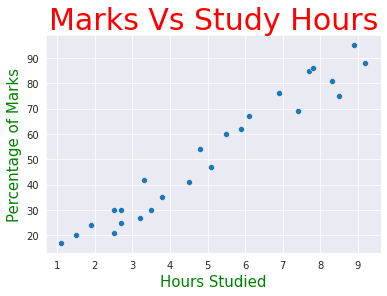

In [ ]:
sns.set_style('darkgrid')
sns.scatterplot(y= data['Scores'], x= data['Hours'])
plt.title('Marks Vs Study Hours',size=30,color='r')
plt.ylabel('Percentage of Marks', size=15, color='g')
plt.xlabel('Hours Studied', size=15,color='g')
plt.show()

***From the above scatter plot, we can notice a correlation between between the number of 'Hours Studied' and 'Percentage of Marks' scored.***

***To confirm, we can draw a regression line as well.***

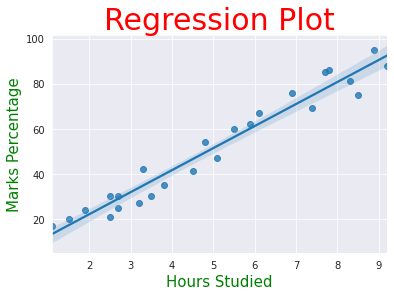


           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [ ]:
sns.regplot(x= data['Hours'], y= data['Scores'])
plt.title('Regression Plot',size=30, color='r')
plt.ylabel('Marks Percentage', size=15, color='g',)
plt.xlabel('Hours Studied', size=15,color='g')
plt.show()
print()
print(data.corr())

***Hence, we can see that the variables are positively correlated.***

### **Training the model**

**1. Splitting the data**

In [ ]:
# Defining X and y from the Data
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

# Spliting the Data in two
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

**2. Fitting the data into model**

In [ ]:
regression = LinearRegression()
regression.fit(train_X, train_y)
print("The model haas been trained successfully.")

The model haas been trained successfully.


## **Predicting the percentage of marks**

In [ ]:
pred_y = regression.predict(val_X)
prediction = pd.DataFrame({'Hours': [i[0] for i in val_X], 'Predicted Marks': [k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


## **Comparing the Predicted Marks with the Actual Marks**

In [ ]:
compare_scores = pd.DataFrame({'Actual Marks': val_y, 'Predicted Marks': pred_y})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


## **Visually Comparing the Predicted Marks with the Actual Marks**

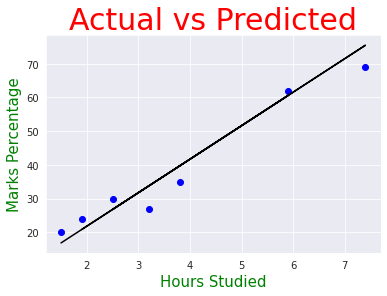

In [ ]:
plt.scatter(x=val_X, y=val_y, color='blue')
plt.plot(val_X, pred_y, color='Black')
plt.title('Actual vs Predicted', size=30,color='r')
plt.ylabel('Marks Percentage', size=15,color='g')
plt.xlabel('Hours Studied', size=15,color='g')
plt.show()

## **Evaluating the model**

In [ ]:
# Calculating the accuracy of the model
print('Mean absolute error: ',mean_absolute_error(val_y,pred_y))

Mean absolute error:  4.130879918502482


***Small value of Mean absolute error states that the chances of error or wrong forecasting through the model are very less.***

## **What will be predicted score if a student studies for 9.25 hrs/ day?**

In [ ]:
hours = [9.25]
answer = regression.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 93.893


***According to the model, if a student studies for 9.25hrs/day, they are likely to score 93.893%***